# Comparing Clustering Algorthims Using Simulated Data and the Iris Dataset

This kernel serves as an exploratory analysis to compare several clustering algorithms against each other in different simulated scenarios before finally applying them towards a real dataset in the Iris dataset. The clustering algorithms which we will explore come from the article "The 5 Clustering Algorithms Data Scientists Need to Know" available [here](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68). The 5 algorithms mentioned are based on popularity among data scientists and include:
* K-means Clustering - Using the 'kmeans' function from the Stats package in R
* Mean-Shift Clustering
* Density Based Spacial Clustering of Applications with Noise (DBSCAN)
* Expectation-Maximization Clustering using Guassian Mixture Models
* Hierarchical Clustering

In [1]:
library(ggplot2)
library(repr)
library(gridExtra)
library(meanShiftR)
library(mclust)
set.seed(1055)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.


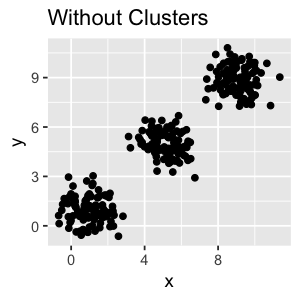

In [38]:
options(repr.plot.width=2.5, repr.plot.height=2.5)
x = rnorm(100,1,.8)
y = rnorm(100,1,.8)
one = rep(1,100)
clust1 = cbind(one,x,y)
x = rnorm(100,5,.8)
y = rnorm(100,5,.8)
two = rep(2,100)
clust2 = cbind(two,x,y)
x = rnorm(100,9,.8)
y = rnorm(100,9,.8)
three = rep(2,100)
clust3 = cbind(three,x,y)
df1 = rbind(clust1,clust2,clust3)
df1 = data.frame(df1)
ggplot(df1,aes(x=x,y=y))+geom_point()+ggtitle('Without Clusters')

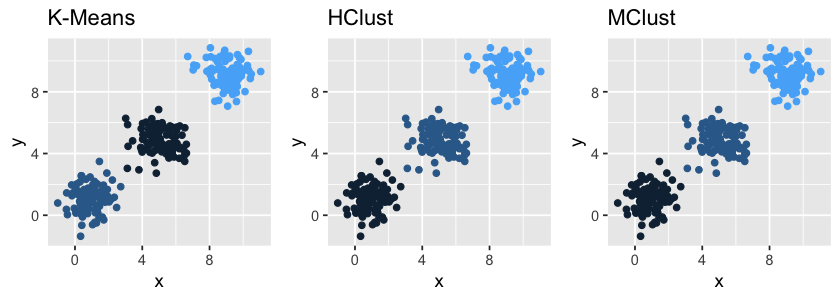

In [29]:
options(repr.plot.width=7, repr.plot.height=2.5)
km = kmeans(df1,centers=3)
p1 = ggplot(df1,aes(x=x,y=y,color=km$cluster))+geom_point()+theme(legend.position = "none")+ggtitle('K-Means')
dists = dist(df1)
hc = hclust(dists,'complete')
ct = cutree(hc,3)
p2 =ggplot(df1,aes(x=x,y=y,color=ct))+geom_point()+theme(legend.position = "none")+ggtitle('HClust') 
mc = Mclust(df1,3)
p3 =ggplot(df1,aes(x=x,y=y,color=mc$classification))+geom_point()+theme(legend.position="none")+ggtitle('MClust') 
grid.arrange(p1,p2,p3,nrow = 1)

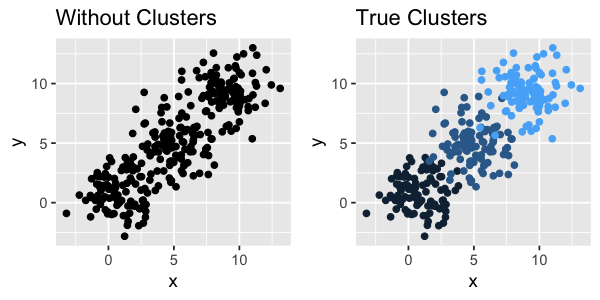

In [35]:
options(repr.plot.width=5, repr.plot.height=2.5)
x = rnorm(100,1,1.5)
y = rnorm(100,1,1.5)
one = rep(1,100)
clust1 = cbind(one,x,y)
x = rnorm(100,5,1.5)
y = rnorm(100,5,1.5)
two = rep(2,100)
clust2 = cbind(two,x,y)
x = rnorm(100,9,1.5)
y = rnorm(100,9,1.5)
three = rep(3,100)
clust3 = cbind(three,x,y)
df2 = rbind(clust1,clust2,clust3)
df2 = data.frame(df2)
p1 = ggplot(df2,aes(x=x,y=y))+geom_point()+ggtitle('Without Clusters') 
p2 = ggplot(df2,aes(x=x,y=y,color=one))+geom_point()+theme(legend.position = "none")+ggtitle('True Clusters') 
grid.arrange(p1,p2,nrow = 1)

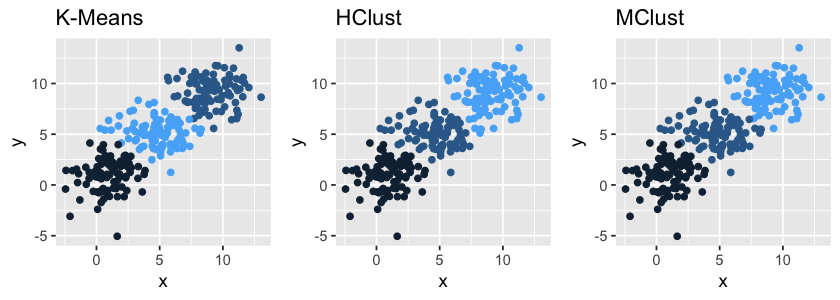

In [31]:
options(repr.plot.width=7, repr.plot.height=2.5)
km = kmeans(df2,centers=3)
p1 = ggplot(df2,aes(x=x,y=y,color=km$cluster))+geom_point()+theme(legend.position = "none")+ggtitle('K-Means')
dists = dist(df2)
hc = hclust(dists,'complete')
ct = cutree(hc,3)
p2 =ggplot(df2,aes(x=x,y=y,color=ct))+geom_point()+theme(legend.position = "none")+ggtitle('HClust') 
mc = Mclust(df2,3)
p3 =ggplot(df2,aes(x=x,y=y,color=mc$classification))+geom_point()+theme(legend.position="none")+ggtitle('MClust') 
grid.arrange(p1,p2,p3,nrow = 1)

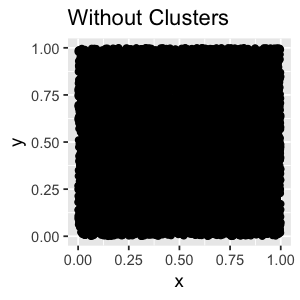

In [37]:
options(repr.plot.width=2.5, repr.plot.height=2.5)
x = runif(10000,0,1)
y = runif(10000,0,1)
df = cbind(x,y)
df = data.frame(df)
ggplot(df,aes(x=x,y=y))+geom_point()+ggtitle('Without Clusters') 

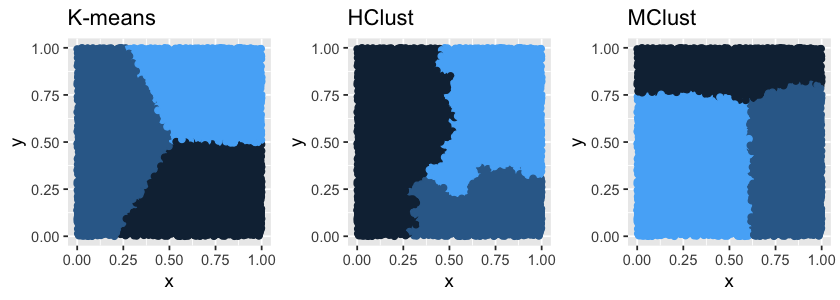

In [30]:
options(repr.plot.width=7, repr.plot.height=2.5)
#Initialize K-means
km = kmeans(df,centers=3)
p1 = ggplot(df,aes(x=x,y=y,color=km$cluster))+geom_point()+theme(legend.position = "none")+ggtitle('K-means') 
#Initialize Hclust
dists = dist(df)
hc = hclust(dists,'complete')
ct = cutree(hc,3)
p2 =ggplot(df,aes(x=x,y=y,color=ct))+geom_point()+theme(legend.position = "none")+ggtitle('HClust') 
mc = Mclust(df,3)
p3 =ggplot(df,aes(x=x,y=y,color=mc$classification))+geom_point()+theme(legend.position="none")+ggtitle('MClust') 
grid.arrange(p1,p2,p3, nrow = 1)

# References
Seif, George. “The 5 Clustering Algorithms Data Scientists Need to Know.” Medium, Towards Data Science, 13 Dec. 2020, towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68. 